# importing libraries

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

# loading the file

In [4]:
df = pd.read_csv('players_20.csv')

In [5]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


# as there are so many columns present, extracting the column names

In [7]:
for col in df.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

# checking column information with its data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [10]:
df.shape

(18278, 104)

# as there are 18278 players in the data, checking player counts based on nationality

In [12]:
df['nationality'].value_counts()

England                1667
Germany                1216
Spain                  1035
France                  984
Argentina               886
                       ... 
Liberia                   1
São Tomé & Príncipe       1
Puerto Rico               1
Bahrain                   1
Indonesia                 1
Name: nationality, Length: 162, dtype: int64

# top 10 countries based on player participation

In [14]:
df['nationality'].value_counts()[0:10]

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

In [15]:
df['nationality'].value_counts()[0:10].keys()

Index(['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands'],
      dtype='object')

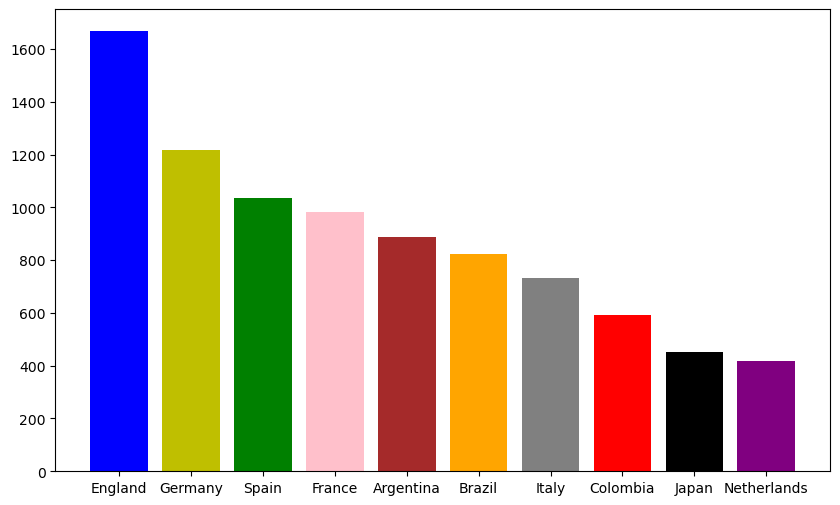

In [16]:
plt.figure(figsize=(10,6))
colors = ['b','y','g','pink','brown','orange','grey','r','black','purple']
plt.bar(list(df['nationality'].value_counts()[0:10].keys()),list(df['nationality'].value_counts()[0:10]),color = colors)
plt.show()

# Getting the top payed player salaries in Euro

In [18]:
player_salary = df[['short_name','wage_eur']]

In [19]:
player_salary.head()

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


In [20]:
#getting the data based on high salary

In [21]:
player_salary = player_salary.sort_values(by=['wage_eur'],ascending = False)

In [22]:
player_salary.head(10)

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000
19,L. Suárez,355000
8,L. Modrić,340000
36,T. Kroos,330000
17,S. Agüero,300000
21,Sergio Busquets,300000


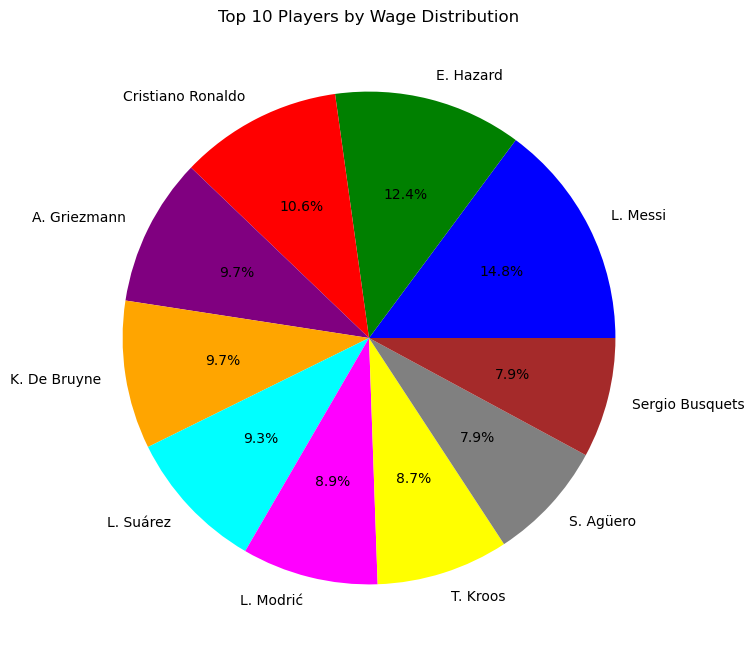

In [23]:
top_players = player_salary.sort_values(by='wage_eur', ascending=False).head(10)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'gray', 'brown']
plt.figure(figsize=(8, 8))
plt.pie(top_players['wage_eur'], labels=top_players['short_name'], colors=colors, autopct='%1.1f%%')
plt.title('Top 10 Players by Wage Distribution')
plt.show()

# Top players with extrordinary shooting skills

In [25]:
Top_shooters = df[['short_name','shooting']]

In [26]:
Top_shooters = Top_shooters.sort_values(by = ['shooting'],ascending = False)

In [27]:
Top_shooters.head(10)

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
12,H. Kane,91.0
17,S. Agüero,90.0
205,F. Quagliarella,89.0
19,L. Suárez,89.0
96,Z. Ibrahimović,88.0
37,M. Reus,88.0
100,G. Bale,87.0
20,R. Lewandowski,87.0


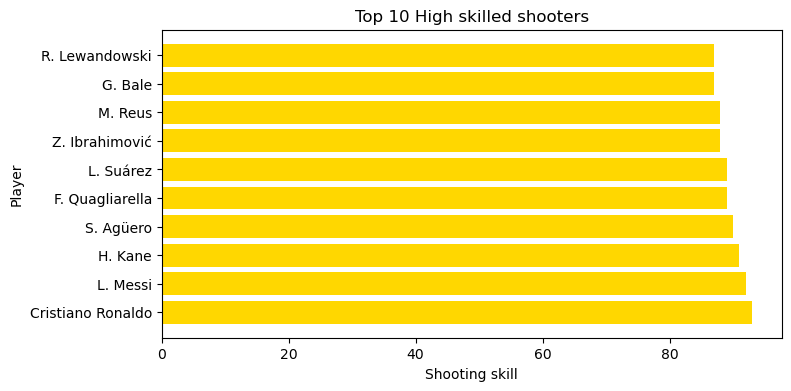

In [28]:
top_goal_scorers = Top_shooters.sort_values(by='shooting', ascending=False).head(10)
plt.figure(figsize=(8, 4))
plt.barh(top_goal_scorers['short_name'], top_goal_scorers['shooting'], color='gold')
plt.xlabel('Shooting skill')
plt.ylabel('Player')
plt.title('Top 10 High skilled shooters')
plt.show()

# Top players with extrordinary defending skills 

In [30]:
Top_defenders =df[['short_name','defending']]

In [31]:
Top_defenders = Top_defenders.sort_values(by=['defending'],ascending=False)

In [32]:
Top_defenders.head(10)

,short_name,defending
16,G. Chiellini,90.0
7,V. van Dijk,90.0
11,K. Koulibaly,89.0
35,D. Godín,89.0
49,M. Hummels,89.0
29,Piqué,88.0
50,T. Alderweireld,88.0
40,A. Laporte,88.0
47,J. Vertonghen,87.0
67,L. Bonucci,87.0


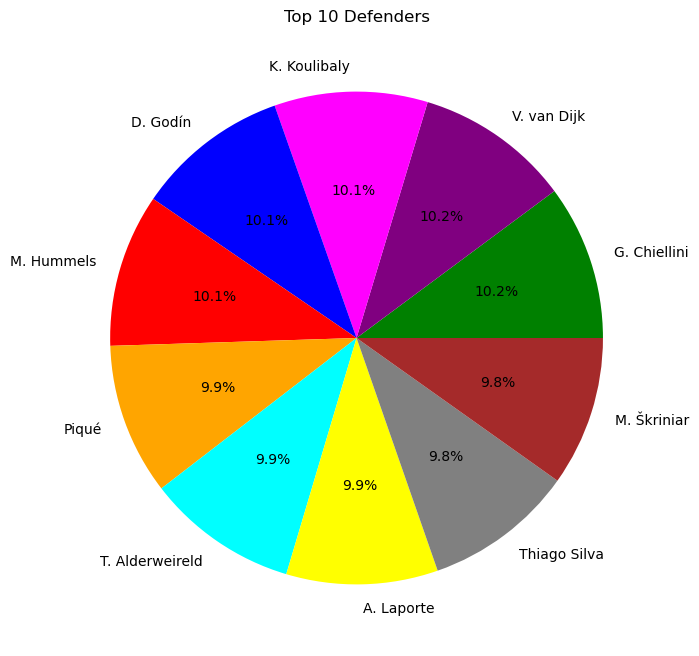

In [33]:
top_defenders = Top_defenders.sort_values(by='defending', ascending=False).head(10)
colors = ['green','purple','magenta','blue', 'red', 'orange', 'cyan', 'yellow', 'gray', 'brown']
plt.figure(figsize=(8, 8))
plt.pie(top_defenders['defending'], labels=top_defenders['short_name'], colors=colors, autopct='%1.1f%%')
plt.title('Top 10 Defenders')
plt.show()

# Top Goal keepers with high reflex rates

In [35]:
Top_gk = df[['short_name','gk_reflexes']]

In [36]:
Top_gk = Top_gk.sort_values(by=['gk_reflexes'],ascending=False)

In [37]:
Top_gk.head(10)

,short_name,gk_reflexes
14,De Gea,92.0
32,H. Lloris,91.0
53,K. Navas,90.0
6,M. ter Stegen,90.0
74,G. Donnarumma,90.0
88,R. Bürki,89.0
86,A. Lopes,89.0
3,J. Oblak,89.0
30,S. Handanovič,89.0
13,Alisson,89.0


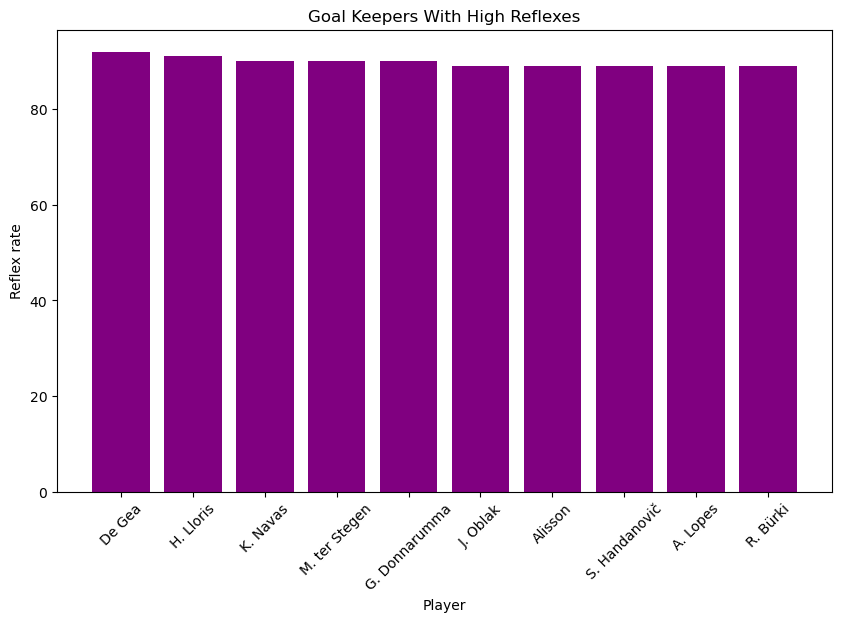

In [38]:
Top_10_gk = Top_gk.sort_values(by=['gk_reflexes'],ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(Top_10_gk['short_name'], Top_10_gk['gk_reflexes'],color='purple')
plt.xlabel('Player')
plt.ylabel('Reflex rate')
plt.title('Goal Keepers With High Reflexes')
plt.xticks(rotation=45)
plt.show()

# Upcoming Rising stars 

In [40]:
Rising_stars = df[['short_name','age','overall']]

In [41]:
Rising_stars= Rising_stars[(Rising_stars['age'] <= 22) & (Rising_stars['overall'] >= 80)]

In [42]:
Rising_stars.head(10)

,short_name,age,overall
10,K. Mbappé,20,89
73,M. de Ligt,19,85
74,G. Donnarumma,20,85
75,F. de Jong,22,85
108,J. Sancho,19,84
109,K. Havertz,20,84
110,O. Dembélé,22,84
115,Arthur,22,84
160,T. Alexander-Arnold,20,83
161,L. Jović,21,83


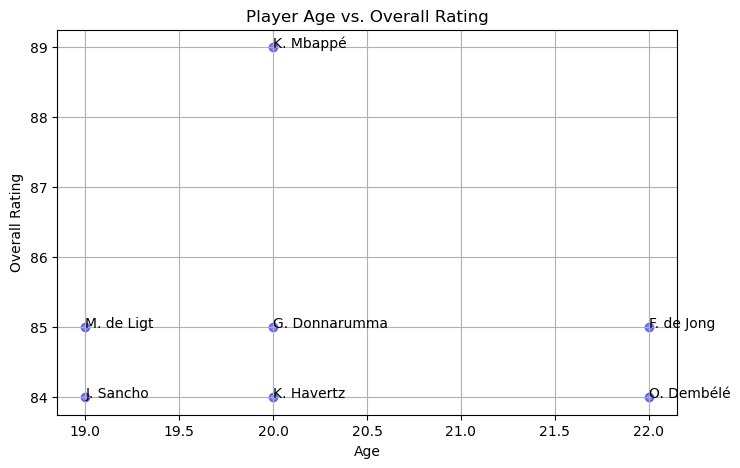

In [46]:
Rising_stars = Rising_stars[(Rising_stars['age'] <= 22) & (Rising_stars['overall'] >= 80)].head(7)
plt.figure(figsize=(8, 5))
plt.scatter(Rising_stars['age'], Rising_stars['overall'], marker='o', color='b', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Player Age vs. Overall Rating')
for i, player_name in enumerate(Rising_stars['short_name']):
    plt.annotate(player_name, (Rising_stars['age'].iloc[i], Rising_stars['overall'].iloc[i]))
plt.grid(True)
plt.show()

# Top 10 overall best players

In [47]:
Top_10_overall = df[['short_name','overall']]

In [48]:
Top_10_overall = Top_10_overall.sort_values(by=['overall'], ascending=False)

In [50]:
Top_10_overall.head(10)

,short_name,overall
0,L. Messi,94
1,Cristiano Ronaldo,93
2,Neymar Jr,92
3,J. Oblak,91
4,E. Hazard,91
5,K. De Bruyne,91
6,M. ter Stegen,90
7,V. van Dijk,90
8,L. Modrić,90
9,M. Salah,90


# Leading Clubs

In [58]:
club_counts = df['club'].value_counts()
top_10_clubs = club_counts.head(10)
print(top_10_clubs)

FC Barcelona           33
Real Valladolid CF     33
VfL Wolfsburg          33
Crystal Palace         33
Eintracht Frankfurt    33
Hertha BSC             33
Leicester City         33
AS Monaco              33
SC Paderborn 07        33
Sevilla FC             33
Name: club, dtype: int64
